
# Predicting the Price of Used Cars Using Machine Learning Algorithms
<font color = 'Blue'> 
Names: Shin Le, Jeongyeon Kim, Benjamin Horvath, Nico Reategui, Paul Giglio




Proposal: https://docs.google.com/document/d/1zhQrkWmJjjMU6wIfBC78MygGzp-XUrkaUOWALfyAL9Q/edit

Dataset: 
* https://www.kaggle.com/datasets/wspirat/germany-used-cars-dataset-2023/data
    
* https://www.kaggle.com/datasets/andreinovikov/used-cars-dataset

<a id="0"></a> <br>
<font color = 'Blue'> 
# Table of Contents
1. [Importing Libraries](#1)
1. [Loading Cleaned Dataset](#6)
1. [Data Splitting](#7)
1. [Models Evaluations and Predictions](#8)
   1. [*Full Model* with *Linear Regression*](#81)
      1. [Using Sequential Feature Selection for the *Linear Regression*](#811)
   1. [*Decision Tree*](#82)
      1. [*A Pruned Tree*](#821)
   1. [Ensemble Method: *Random Forest Regression*](#83)
   1. [Ensemble Method: *Gradient Boosting Regression*](#84)
   1. [*Support Vector Machine* (SVM)](#85)
   1. [Evaluation](#86)

<a id="1"></a>
<font color = 'blue'> 
## **1. Importing Libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
%matplotlib inline  # Ensures that Matplotlib plots are displayed inline

import statsmodels.api as sm


#preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder 


UsageError: unrecognized arguments: # Ensures that Matplotlib plots are displayed inline


In [4]:
#https://raw.githubusercontent.com/syl21b/Car-Price-Prediction/main/cleaned_data.csv?token=GHSAT0AAAAAACIQMGDUQEDEBWXNQO37GZHEZKFPEDA


# Define the URL of the CSV file on GitHub
csv_url = "https://raw.githubusercontent.com/syl21b/Car-Price-Prediction/main/cleaned_data.csv?token=GHSAT0AAAAAACIQMGDU6XOROEDEBWBVET54ZKFQFAA"

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_url)

In [5]:
df

,manufacturer,year,mileage,transmission,drivetrain,fuel_type,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_rating,driver_rating,driver_reviews_num,price,Engine Displacement (L),Engine Type,Engine Features,City MPG,Highway MPG
0,Acura,2023,6.0,Automatic CVT,FWD,Gasoline,Red,Ebony,0.0,0.0,0.0,4.900000,4.6,5,37434,1.5,I4,16V GDI DOHC Turbo,29.0,36.0
1,Acura,2023,10805.0,6-Speed Manual,FWD,Gasoline,Gray,Ebony,0.0,1.0,0.0,4.500000,4.6,5,37500,1.5,I4,16V GDI DOHC Turbo,26.0,36.0
2,Acura,2023,3742.0,6-Speed Manual,FWD,Gasoline,White,Red,0.0,1.0,0.0,4.159732,4.6,5,38995,1.5,I4,16V GDI DOHC Turbo,26.0,36.0
3,Acura,2023,5489.0,Automatic CVT,FWD,Gasoline,Black,Ebony,0.0,1.0,1.0,3.900000,4.6,5,34990,1.5,I4,16V GDI DOHC Turbo,29.0,36.0
4,Acura,2023,6854.0,6-Speed Manual,FWD,Gasoline,White,Red,0.0,1.0,1.0,4.159732,4.6,5,36946,1.5,I4,16V GDI DOHC Turbo,26.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141477,Chevrolet,1995,21949.0,4-Speed Automatic,RWD,Gasoline,Red,Gray,0.0,0.0,1.0,2.700000,4.7,4,26994,5.7,V8,16V MPFI OHV,17.0,25.0
141478,Ford,1995,12825.0,4-Speed Automatic,FWD,Gasoline,Silver,Gray,0.0,1.0,0.0,3.400000,4.4,9,18987,3.2,V6,24V MPFI DOHC,18.0,26.0
141479,Mazda,1995,132069.0,Automatic,FWD,Gasoline,White,Black,0.0,0.0,0.0,3.700000,4.3,4,2990,1.6,I4,16V MPFI SOHC,29.0,37.0
141480,Mitsubishi,1995,29590.0,4-Speed Automatic,FWD,Gasoline,Red,Black,0.0,0.0,1.0,4.159732,4.6,17,32895,3.0,V6,24V MPFI DOHC,19.0,25.0


In [6]:
cat_columns= df.select_dtypes(include=['object']).columns.tolist()
cat_columns

['manufacturer',
 'transmission',
 'drivetrain',
 'fuel_type',
 'exterior_color',
 'interior_color',
 'Engine Type',
 'Engine Features']

In [7]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Encode each categorical column
for col in cat_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Your DataFrame now contains the encoded values
df

,manufacturer,year,mileage,transmission,drivetrain,fuel_type,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_rating,driver_rating,driver_reviews_num,price,Engine Displacement (L),Engine Type,Engine Features,City MPG,Highway MPG
0,0,2023,6.0,17,2,3,13,7,0.0,0.0,0.0,4.900000,4.6,5,37434,1.5,2,1,29.0,36.0
1,0,2023,10805.0,9,2,3,8,7,0.0,1.0,0.0,4.500000,4.6,5,37500,1.5,2,1,26.0,36.0
2,0,2023,3742.0,9,2,3,19,15,0.0,1.0,0.0,4.159732,4.6,5,38995,1.5,2,1,26.0,36.0
3,0,2023,5489.0,17,2,3,2,7,0.0,1.0,1.0,3.900000,4.6,5,34990,1.5,2,1,29.0,36.0
4,0,2023,6854.0,9,2,3,19,15,0.0,1.0,1.0,4.159732,4.6,5,36946,1.5,2,1,26.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141477,5,1995,21949.0,2,3,3,13,10,0.0,0.0,1.0,2.700000,4.7,4,26994,5.7,5,6,17.0,25.0
141478,8,1995,12825.0,2,2,3,16,10,0.0,1.0,0.0,3.400000,4.4,9,18987,3.2,4,14,18.0,26.0
141479,19,1995,132069.0,16,2,3,19,2,0.0,0.0,0.0,3.700000,4.3,4,2990,1.6,2,7,29.0,37.0
141480,21,1995,29590.0,2,2,3,13,2,0.0,0.0,1.0,4.159732,4.6,17,32895,3.0,4,14,19.0,25.0


In [8]:
'''Q1 = num_columns[numerical_cols].quantile(0.25)
Q3 = num_columns[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers and create a boolean mask
outliers_mask = (num_columns[numerical_cols] < lower_bound) | (num_columns[numerical_cols] > upper_bound)

# Drop the rows containing outliers
num_columns = num_columns[~outliers_mask]'''

'Q1 = num_columns[numerical_cols].quantile(0.25)\nQ3 = num_columns[numerical_cols].quantile(0.75)\nIQR = Q3 - Q1\n\n# Define the lower and upper bounds for outliers\nlower_bound = Q1 - 1.5 * IQR\nupper_bound = Q3 + 1.5 * IQR\n\n# Identify outliers and create a boolean mask\noutliers_mask = (num_columns[numerical_cols] < lower_bound) | (num_columns[numerical_cols] > upper_bound)\n\n# Drop the rows containing outliers\nnum_columns = num_columns[~outliers_mask]'

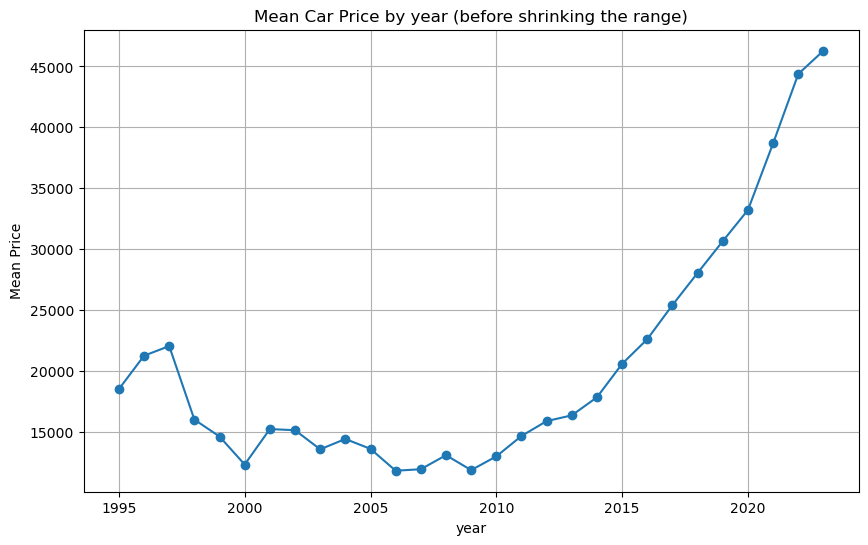

In [9]:

mean_prices_by_year = df.groupby('year')['price'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(mean_prices_by_year['year'], mean_prices_by_year['price'], marker='o', linestyle='-')
plt.title('Mean Car Price by year (before shrinking the range)')
plt.xlabel('year')
plt.ylabel('Mean Price')
plt.grid(True)
plt.show()

In [10]:
# Shuffle the rows of the DataFrame randomly
df_shuffled = df.sample(frac=1, random_state=1)  # Use a random_state for reproducibility

# Split the shuffled DataFrame into four equal-sized pieces
df_pieces = np.array_split(df_shuffled, 4)

In [11]:
reset_df_pieces = []  # Create a list to store the DataFrames with reset index

for i in range(4):
    reset_df = df_pieces[i].reset_index(drop=True)  # Reset the index and drop the old index column
    reset_df_pieces.append(reset_df)  # Append the reset DataFrame to the list

# Now, reset_df_pieces contains the DataFrames with reset index

In [12]:
reset_df_pieces[1]

,manufacturer,year,mileage,transmission,drivetrain,fuel_type,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_rating,driver_rating,driver_reviews_num,price,Engine Displacement (L),Engine Type,Engine Features,City MPG,Highway MPG
0,6,2016,86071.0,15,2,3,13,2,0.0,0.0,0.0,4.159732,4.4,140,15095,3.6,4,14,23.000000,36.000000
1,2,2019,38103.0,13,1,3,8,2,0.0,0.0,0.0,1.500000,4.0,8,39890,3.0,3,11,18.000000,24.000000
2,25,2019,33050.0,4,1,3,19,2,0.0,0.0,1.0,4.159732,4.6,93,23998,2.0,0,0,23.000000,31.000000
3,26,2010,165455.0,3,2,3,2,2,1.0,0.0,1.0,2.500000,4.6,71,12333,3.5,4,14,18.000000,24.000000
4,9,2020,54114.0,15,2,3,18,11,0.0,1.0,0.0,3.000000,4.6,81,27995,1.5,2,1,26.000000,30.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35366,25,2020,30856.0,17,1,3,5,2,0.0,1.0,1.0,4.600000,4.8,83,27009,2.4,0,1,21.000000,27.000000
35367,24,2021,18613.0,6,0,0,4,6,1.0,1.0,0.0,4.159732,5.0,6,61500,6.7,3,9,21.622774,28.657079
35368,26,2020,43891.0,13,2,3,19,0,0.0,1.0,0.0,4.200000,4.7,147,24000,2.5,2,8,28.000000,39.000000
35369,24,2015,75888.0,13,3,1,4,2,1.0,0.0,1.0,4.500000,4.6,198,32988,3.6,4,15,17.000000,25.000000


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [14]:
# Split the dataset into four smaller datasets
X_train1, X_test1, y_train1, y_test1 = train_test_split(reset_df_pieces[0].drop('price', axis=1), reset_df_pieces[0]['price'], test_size=0.25, random_state=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(reset_df_pieces[1].drop('price', axis=1), reset_df_pieces[1]['price'], test_size=0.25, random_state=2)
X_train3, X_test3, y_train3, y_test3 = train_test_split(reset_df_pieces[2].drop('price', axis=1), reset_df_pieces[2]['price'], test_size=0.25, random_state=3)
X_train4, X_test4, y_train4, y_test4 = train_test_split(reset_df_pieces[3].drop('price', axis=1), reset_df_pieces[3]['price'], test_size=0.25, random_state=4)


In [15]:
# Create linear regression models
model1 = LinearRegression()
model2 = LinearRegression()
model3 = LinearRegression()
model4 = LinearRegression()

# Train the models on the smaller datasets
model1.fit(X_train1, y_train1)
model2.fit(X_train2, y_train2)
model3.fit(X_train3, y_train3)
model4.fit(X_train4, y_train4)


LinearRegression()

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on the test sets
y_pred1 = model1.predict(X_test1)
y_pred2 = model2.predict(X_test2)
y_pred3 = model3.predict(X_test3)
y_pred4 = model4.predict(X_test4)

# Calculate evaluation metrics
mae1 = mean_absolute_error(y_test1, y_pred1)
mse1 = mean_squared_error(y_test1, y_pred1)
r2_1 = r2_score(y_test1, y_pred1)

mae2 = mean_absolute_error(y_test2, y_pred2)
mse2 = mean_squared_error(y_test2, y_pred2)
r2_2 = r2_score(y_test2, y_pred2)

mae3 = mean_absolute_error(y_test3, y_pred3)
mse3 = mean_squared_error(y_test3, y_pred3)
r2_3 = r2_score(y_test3, y_pred3)

mae4 = mean_absolute_error(y_test4, y_pred4)
mse4 = mean_squared_error(y_test4, y_pred4)
r2_4 = r2_score(y_test4, y_pred4)

# Print or store the evaluation results
print("Model 1 MAE:", mae1)
print("Model 1 MSE:", mse1)
print("Model 1 R2:", r2_1)

print("Model 2 MAE:", mae2)
print("Model 2 MSE:", mse2)
print("Model 2 R2:", r2_2)


print("Model 3 MAE:", mae3)
print("Model 3 MSE:", mse3)
print("Model 3 R2:", r2_3)

print("Model 4 MAE:", mae4)
print("Model 4 MSE:", mse4)
print("Model 4 R2:", r2_4)


Model 1 MAE: 6427.294239328026
Model 1 MSE: 103367120.81038831
Model 1 R2: 0.5991480872934909
Model 2 MAE: 6340.329012577276
Model 2 MSE: 107149619.51354522
Model 2 R2: 0.5947862290556652
Model 3 MAE: 6280.1140146302405
Model 3 MSE: 99067792.304664
Model 3 R2: 0.6177813502407636
Model 4 MAE: 6511.602400231905
Model 4 MSE: 109241741.31520794
Model 4 R2: 0.5938553704202699


In [23]:
train_data=reset_df_pieces[1].copy()
test_data=reset_df_pieces[3].copy()

In [24]:
train_data.shape

(35371, 20)

In [26]:
train_data

,manufacturer,year,mileage,transmission,drivetrain,fuel_type,exterior_color,interior_color,accidents_or_damage,one_owner,personal_use_only,seller_rating,driver_rating,driver_reviews_num,price,Engine Displacement (L),Engine Type,Engine Features,City MPG,Highway MPG
0,6,2016,86071.0,15,2,3,13,2,0.0,0.0,0.0,4.159732,4.4,140,15095,3.6,4,14,23.000000,36.000000
1,2,2019,38103.0,13,1,3,8,2,0.0,0.0,0.0,1.500000,4.0,8,39890,3.0,3,11,18.000000,24.000000
2,25,2019,33050.0,4,1,3,19,2,0.0,0.0,1.0,4.159732,4.6,93,23998,2.0,0,0,23.000000,31.000000
3,26,2010,165455.0,3,2,3,2,2,1.0,0.0,1.0,2.500000,4.6,71,12333,3.5,4,14,18.000000,24.000000
4,9,2020,54114.0,15,2,3,18,11,0.0,1.0,0.0,3.000000,4.6,81,27995,1.5,2,1,26.000000,30.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35366,25,2020,30856.0,17,1,3,5,2,0.0,1.0,1.0,4.600000,4.8,83,27009,2.4,0,1,21.000000,27.000000
35367,24,2021,18613.0,6,0,0,4,6,1.0,1.0,0.0,4.159732,5.0,6,61500,6.7,3,9,21.622774,28.657079
35368,26,2020,43891.0,13,2,3,19,0,0.0,1.0,0.0,4.200000,4.7,147,24000,2.5,2,8,28.000000,39.000000
35369,24,2015,75888.0,13,3,1,4,2,1.0,0.0,1.0,4.500000,4.6,198,32988,3.6,4,15,17.000000,25.000000


In [25]:
test_data.shape

(35370, 20)